## 1. Blood glucose over time (line plot)

<b>Purpose:</b> Show how glucose fluctuates in order to observe trends in glucose levels over time for each patient, which is the core focus of CGM data. It's relevant because the CGM data is highly time-dependent, so it's important to visualize how glucose changes during specific periods (e.g. after meals, during sleep, or after insulin injections).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [2]:
base_dir = os.path.abspath(os.path.join("..", "data", "interim"))
file_path = os.path.join(base_dir, "train_featured.csv") 
patients = pd.read_csv(file_path, low_memory=False)

p01 = patients[patients['p_num'] == 'p01']
p01.head()

,p_num,Unnamed: 1,id,p_num.1,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,...,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,time_delta,pseudo_datetime,days_elapsed,time_interval
0,p01,0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.4,0 days 06:10:00,2020-01-01 06:10:00,0,15.0
1,p01,1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.8,0 days 06:25:00,2020-01-01 06:25:00,0,15.0
2,p01,2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.5,0 days 06:40:00,2020-01-01 06:40:00,0,15.0
3,p01,3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.8,0 days 06:55:00,2020-01-01 06:55:00,0,15.0
4,p01,4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.7,0 days 07:10:00,2020-01-01 07:10:00,0,15.0


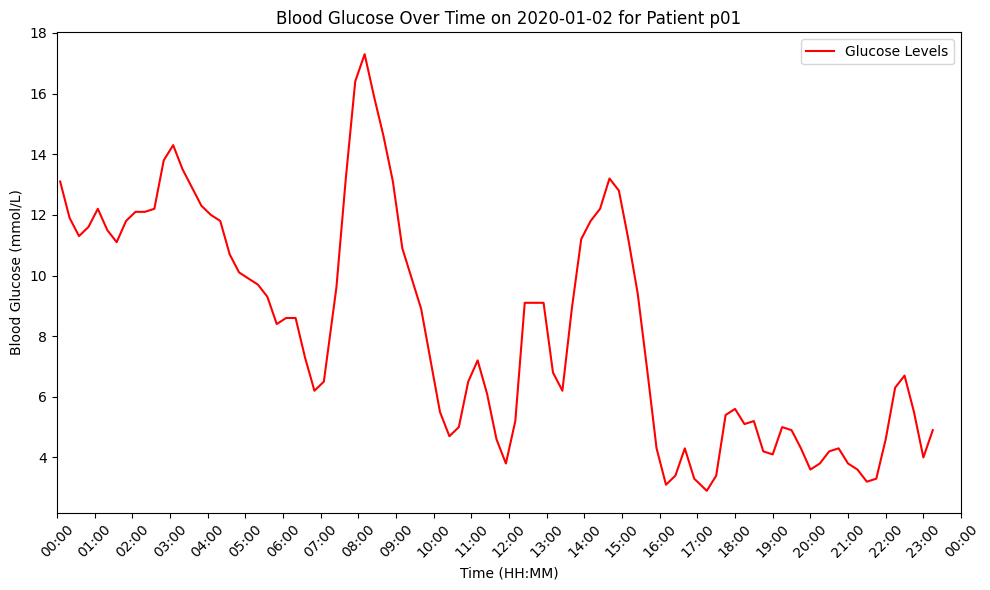

In [44]:
# Ensure 'pseudo_datetime' is in datetime format
p01.loc[:, 'pseudo_datetime'] = pd.to_datetime(p01['pseudo_datetime'], errors='coerce')

# Specify the day for which you want to plot the data (e.g., January 1, 2020)
specific_day = '2020-01-02'

# Filter data for the specific day (from 00:00 to 23:59 on that day)
start_datetime = pd.to_datetime(specific_day)
end_datetime = start_datetime + pd.Timedelta(days=1)
p01_filtered = p01[(p01['pseudo_datetime'] >= start_datetime) & 
                   (p01['pseudo_datetime'] < end_datetime)]

# Plot blood glucose ('bg+1:00') over time ('pseudo_datetime') for the filtered day
plt.figure(figsize=(10, 6))
plt.plot(p01_filtered['pseudo_datetime'], p01_filtered['bg+1:00'], label='Glucose Levels', color='red')

# Explicitly set x-axis limits to show the entire 24-hour period
plt.gca().set_xlim([start_datetime, end_datetime])

# Format the x-axis to show only the time (HH:MM) without the date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show time (HH:MM) on the x-axis
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set ticks every hour

# Improve plot appearance
plt.xlabel('Time (HH:MM)')
plt.ylabel('Blood Glucose (mmol/L)')
plt.title(f'Blood Glucose Over Time on {specific_day} for Patient p01')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.legend()
plt.show()


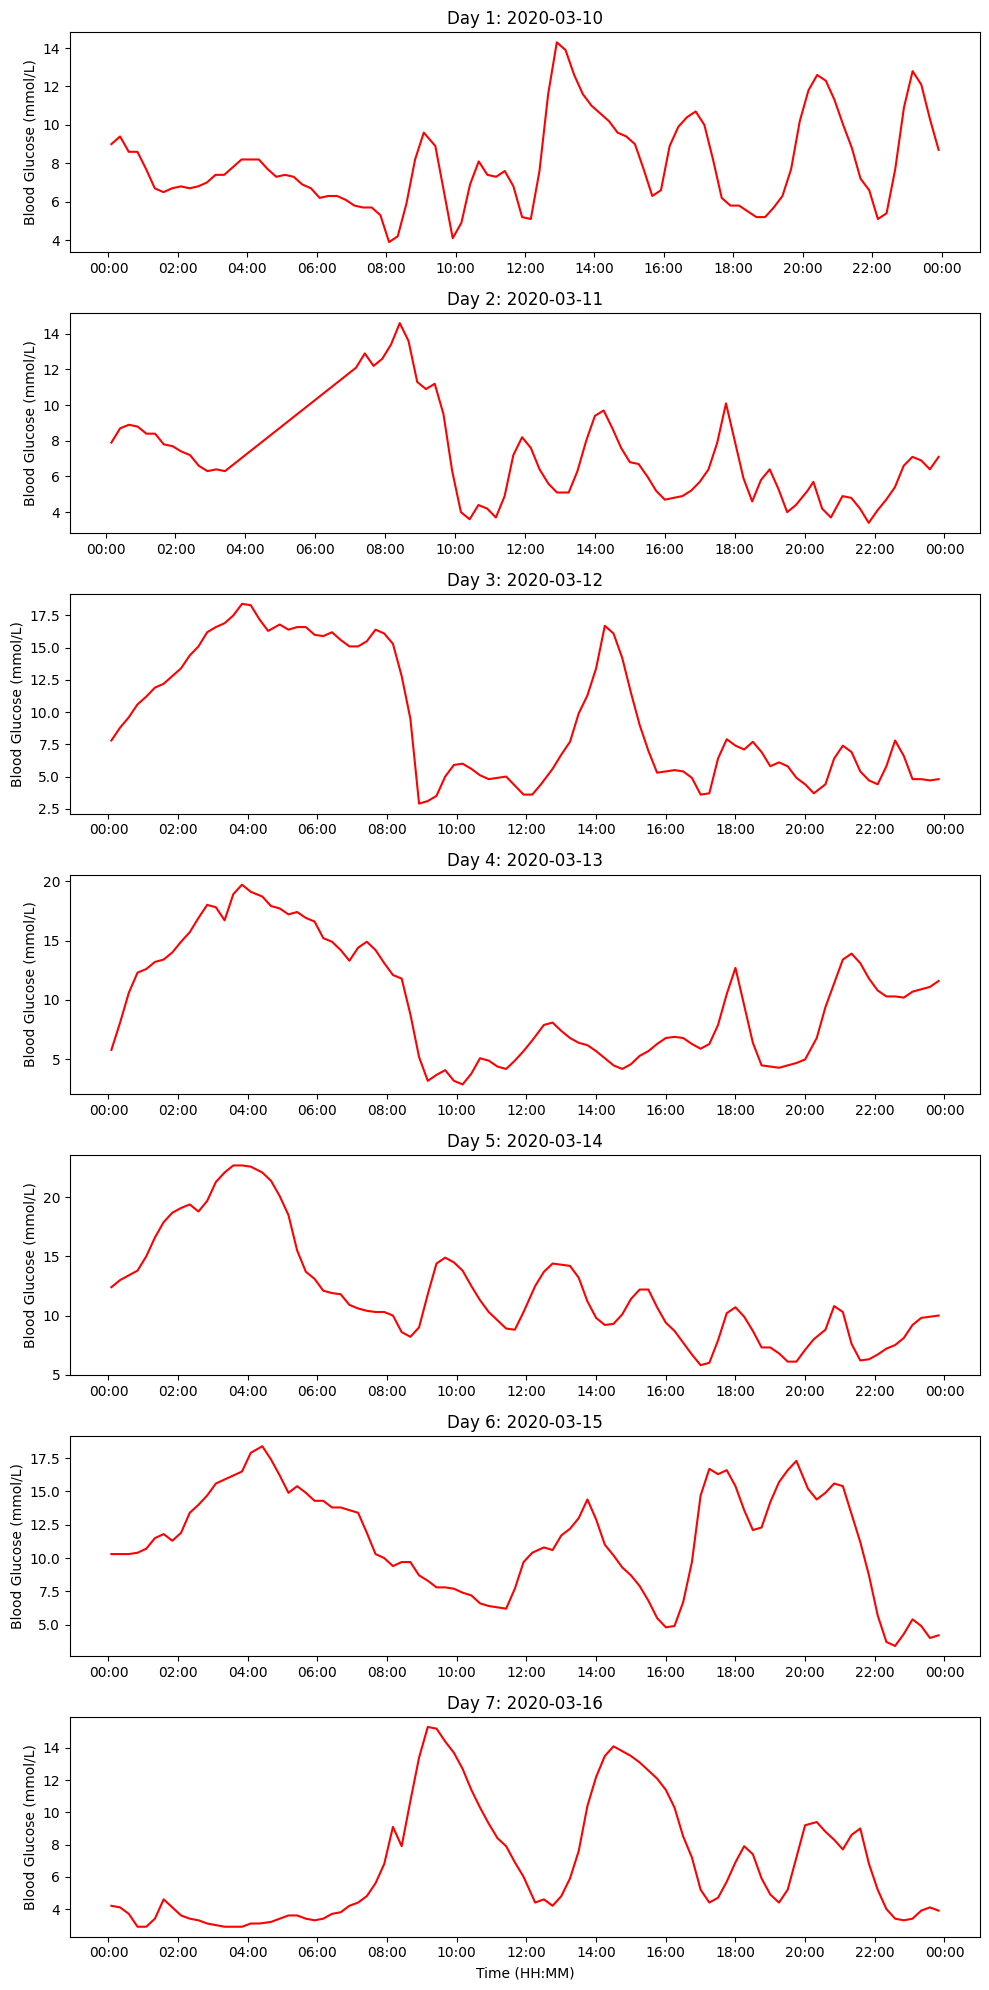

In [53]:
# Ensure 'pseudo_datetime' is in datetime format
#p01.loc[:, 'pseudo_datetime'] = pd.to_datetime(p01['pseudo_datetime'], errors='coerce')

# Define the start date for the 7-day period
start_date = pd.to_datetime('2020-03-10')

# Create a figure with 7 subplots, arranged vertically (1 column, 7 rows)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# Loop over 7 consecutive days
for i in range(7):
    # Filter data for the specific day
    day_start = start_date + pd.Timedelta(days=i)
    day_end = day_start + pd.Timedelta(days=1)
    
    p01_filtered = p01[(p01['pseudo_datetime'] >= day_start) & 
                       (p01['pseudo_datetime'] < day_end)]
    
    # Plot blood glucose ('bg+1:00') over time for the specific day
    axes[i].plot(p01_filtered['pseudo_datetime'], p01_filtered['bg+1:00'], label=f'Glucose Levels on {day_start.date()}', color='red')
    
    # Set title and labels for each subplot
    axes[i].set_title(f'Day {i+1}: {day_start.date()}')
    axes[i].set_ylabel('Blood Glucose (mmol/L)')
    
    # Format the x-axis to show only the time (HH:MM)
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Time (HH:MM)
    axes[i].xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set ticks every 2 hours

# Set the x-axis label for the last subplot
axes[-1].set_xlabel('Time (HH:MM)')

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Show the plot
plt.show()


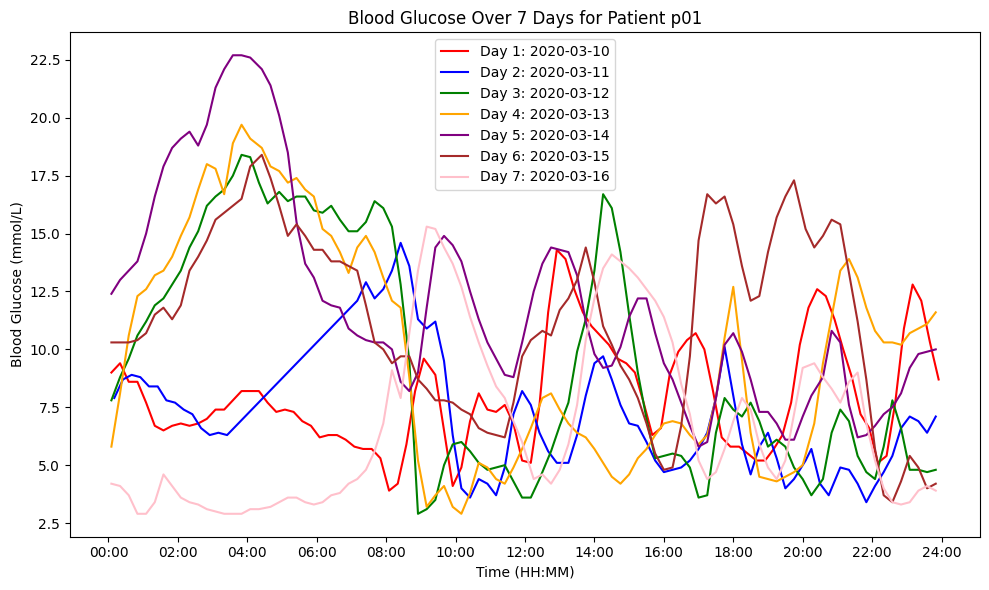

In [69]:
# Define the start date for the 7-day period
start_date = pd.to_datetime('2020-03-10')

# List of colors for each day
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

# Create a figure
plt.figure(figsize=(10, 6))

# Loop over 7 consecutive days
for i in range(7):
    # Filter data for the specific day
    day_start = start_date + pd.Timedelta(days=i)
    day_end = day_start + pd.Timedelta(days=1)
    
    p01_filtered = p01[(p01['pseudo_datetime'] >= day_start) & 
                       (p01['pseudo_datetime'] < day_end)].copy()
    
    # Calculate the number of hours since midnight (as a float) to represent the time of day
    p01_filtered['time_in_hours'] = p01_filtered['pseudo_datetime'].dt.hour + p01_filtered['pseudo_datetime'].dt.minute / 60.0

    # Plot blood glucose ('bg+1:00') over time in hours for each day with a different color
    plt.plot(p01_filtered['time_in_hours'], p01_filtered['bg+1:00'], 
             label=f'Day {i+1}: {day_start.date()}', color=colors[i])

# Set x-axis to show time from 00:00 to 23:59
#plt.gca().set_xlim([0, 24])

# Format the x-axis to show only the time (HH:MM) using Matplotlib's hour formatting
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):02d}:00'))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))  # Set ticks every 2 hours

# Add labels and title
plt.xlabel('Time (HH:MM)')
plt.ylabel('Blood Glucose (mmol/L)')
plt.title('Blood Glucose Over 7 Days for Patient p01')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Add a legend to differentiate each day
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## Distribution of bg+1:00 for Patient p01

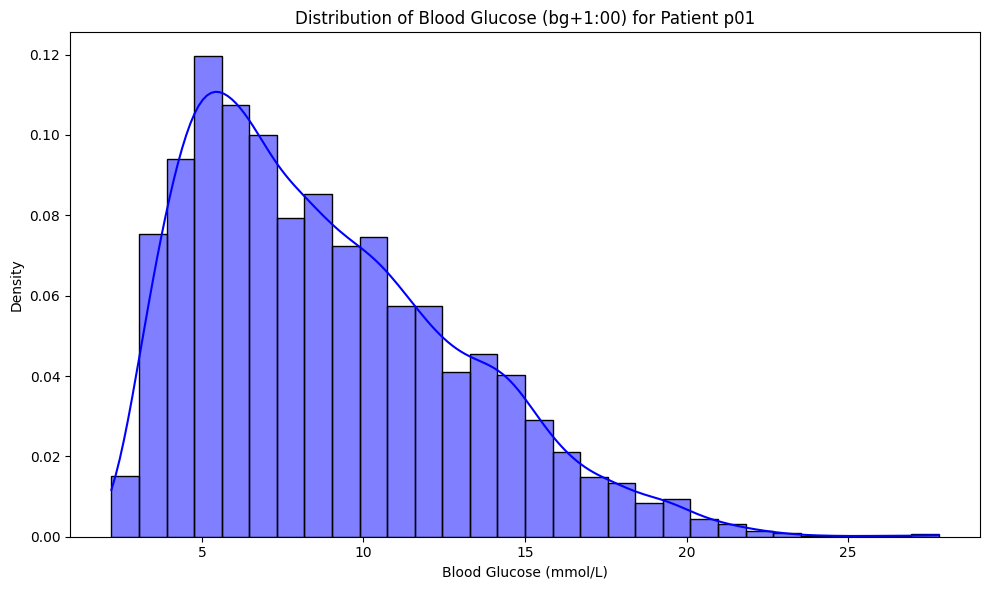

In [70]:
# Filter out any NaN values in bg+1:00 to avoid plotting issues
bg_values = p01['bg+1:00'].dropna()

# Create a figure for the histogram and KDE plot
plt.figure(figsize=(10, 6))

# Plot the histogram of 'bg+1:00'
sns.histplot(bg_values, bins=30, kde=True, color='blue', stat='density')

# Add labels and title
plt.xlabel('Blood Glucose (mmol/L)')
plt.ylabel('Density')
plt.title('Distribution of Blood Glucose (bg+1:00) for Patient p01')

plt.show()

## 2. Distribution of blood glucose values (Histogramm)
- <b>Purpose:</b> To visualize the distribution of blood glucose levels across all patients or specific groups. This offers a clear view of whether patients are maintaining glucose levels within target ranges.


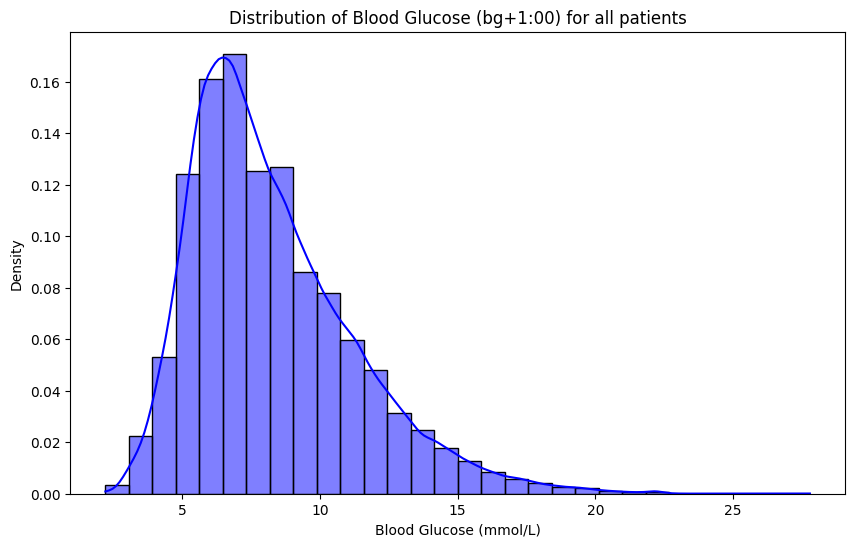

In [82]:
# Filter out any NaN values in bg+1:00 to avoid plotting issues
bg_values = patients['bg+1:00'].dropna()

# Create a figure for the histogram and KDE plot
plt.figure(figsize=(10, 6))

# Plot the histogram of 'bg+1:00'
sns.histplot(bg_values, bins=30, kde=True, color='blue', stat='density')

# Add labels and title
plt.xlabel('Blood Glucose (mmol/L)')
plt.ylabel('Density')
plt.title('Distribution of Blood Glucose (bg+1:00) for all patients')

plt.show()

In [85]:
#['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12']


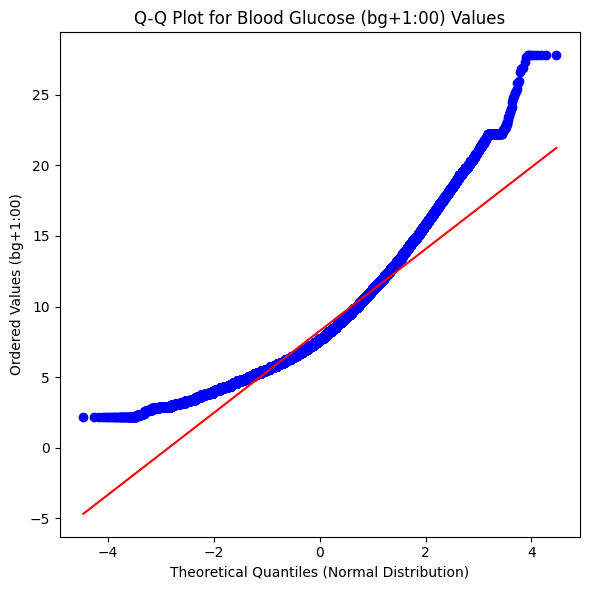

In [83]:
import scipy.stats as stats

# Filter out NaN values in bg+1:00 to avoid issues
bg_values = patients['bg+1:00'].dropna()

# Create a Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(bg_values, dist="norm", plot=plt)

# Add labels and title
plt.title('Q-Q Plot for Blood Glucose (bg+1:00) Values')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Ordered Values (bg+1:00)')

# Show the plot
plt.tight_layout()
plt.show()


&nbsp;&nbsp;&nbsp;&nbsp;Looking at the distribution of blood glucose values (bg+1:00) for all patients, a few observations can be made:

<b>1. Right-Skewed Distribution:</b>
The histogram and KDE show that the distribution is right-skewed. This means that most of the data points are concentrated toward the lower end of the glucose levels (5 to 10 mmol/L), with a tail extending toward higher values. This type of distribution is common in biological data, where extreme high values (outliers) can occur but are less frequent.

<b>2. Mode Around 5-7 mmol/L:</b>
The peak of the distribution appears to be around 5-7 mmol/L. This is considered a healthy or normal range for blood glucose levels in non-diabetic or well-controlled diabetic patients. The fact that most of the values are concentrated around this range may indicate that many patients are maintaining reasonable glucose control.

<b>3. Long Tail:</b>
There is a long tail extending toward higher glucose levels, with some values exceeding 20 mmol/L. High glucose levels (hyperglycemia) could indicate poorly controlled diabetes or post-meal spikes in blood sugar. These extreme values might need closer investigation, especially if they are common for certain patients or occurring at specific times of day (e.g. after meals or during illness).

<b>4. Potential Outliers:</b>
The values above 15 mmol/L could be considered potential outliers or extreme values, as they are relatively rare but still present. These may represent specific conditions or scenarios where blood glucose spikes for certain patients.

<b>5. Next Steps for Analysis:</b>
It could be interesting to explore the distribution for individual patients to see if there are patterns specific to certain individuals.
Investigating the time of day when these higher values occur could also give insights into the daily blood glucose fluctuations.

<b>Interpretation:</b>
This distribution suggests that for most patients, their blood glucose levels tend to cluster within a relatively normal range. However, there are occasional spikes into higher ranges, which may indicate instances of poor glucose control, possibly after meals or during illness.

## 3. Insulin and carbohydrate intake vs. blood glucose (scatter plot with regression line)
- <b>Purpose:</b> Explore the relationship between insulin dosage, carbohydrate intake, and blood glucose levels. It is relevant because insulin and carbohydrates directly affect blood glucose levels. Understanding how these variables relate can provide insights into glycemic control.


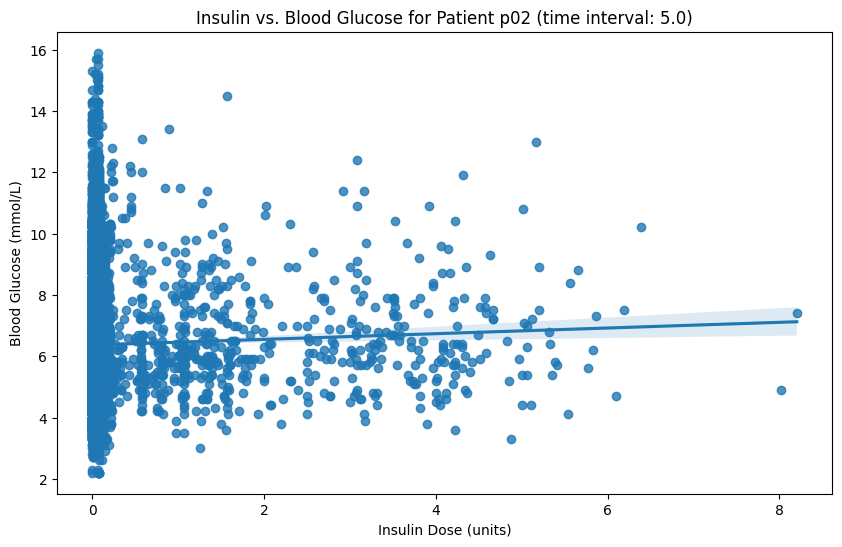

In [100]:
# Example for one patient (e.g., 'p01')
p10 = patients[patients['p_num'] == 'p10']

# Scatter plot with regression line (Insulin vs. Blood Glucose)
plt.figure(figsize=(10, 6))
sns.regplot(x=p10['insulin-3:30'], y=p10['bg+1:00'])
plt.xlabel('Insulin Dose (units)')
plt.ylabel('Blood Glucose (mmol/L)')
plt.title('Insulin vs. Blood Glucose for Patient p02' + f" (time interval: {p10['time_interval'].iloc[0]})")
plt.show()


### Approach #1: sum or aggregate insulin doses

C:\Users\svetl\AppData\Local\Temp\ipykernel_21884\339237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p10['total_insulin_last_1_hour'] = p10[insulin_columns[:12]].sum(axis=1)  # 12 columns = 1 hour (5-min intervals)
C:\Users\svetl\AppData\Local\Temp\ipykernel_21884\339237612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p10['total_insulin_last_2_hours'] = p10[insulin_columns[:24]].sum(axis=1)  # 24 columns = 2 hours
C:\Users\svetl\AppData\Local\Temp\ipykernel_21884\339237612.py:7: SettingWit

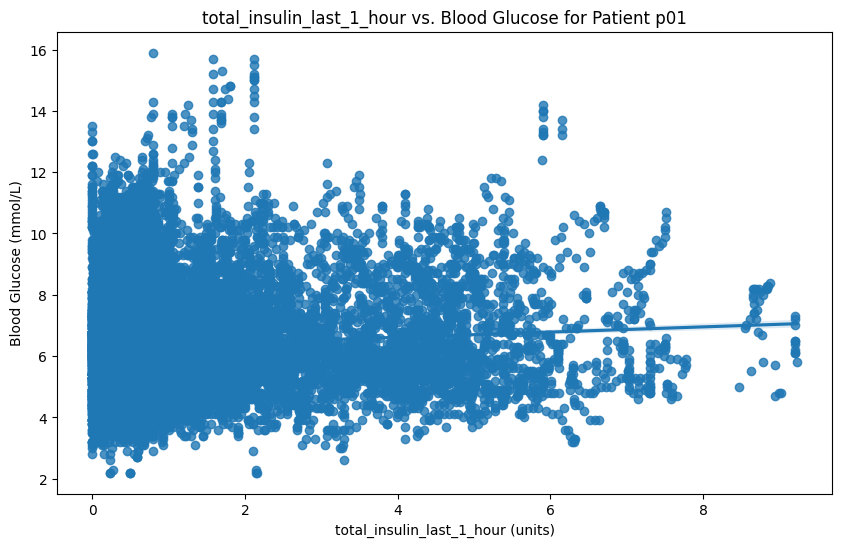

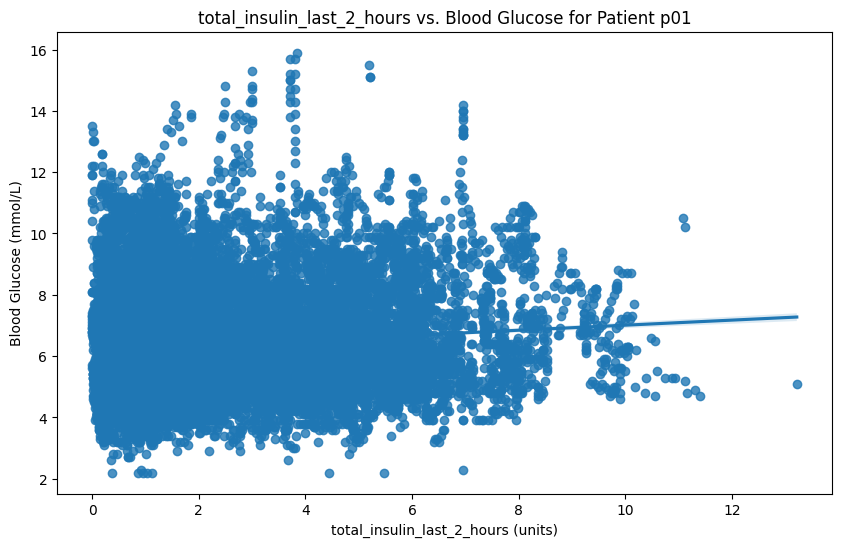

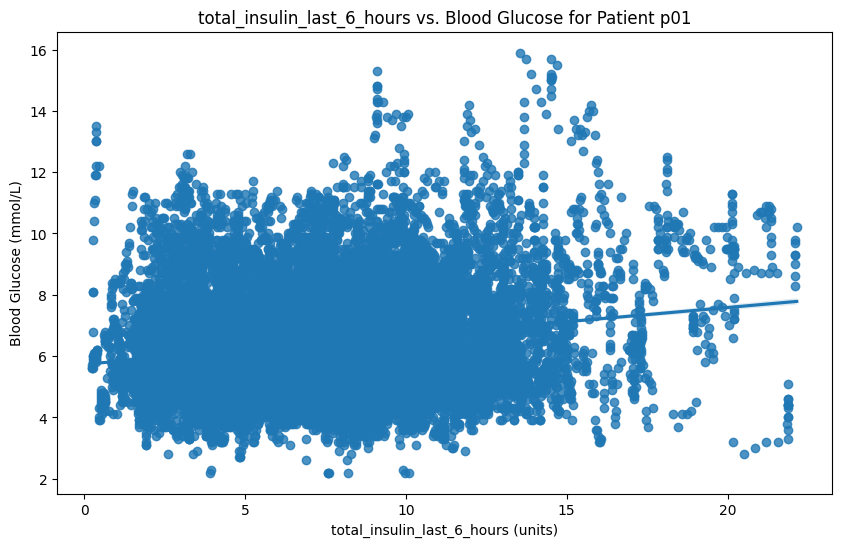

In [98]:
# Select relevant insulin columns (e.g., insulin-0:05, insulin-0:10, ... up to insulin-6:00)
insulin_columns = [col for col in patients.columns if col.startswith('insulin-')]

# Example: Sum or average insulin over different time windows (1 hour, 2 hours, 6 hours)
p10['total_insulin_last_1_hour'] = p10[insulin_columns[:12]].sum(axis=1)  # 12 columns = 1 hour (5-min intervals)
p10['total_insulin_last_2_hours'] = p10[insulin_columns[:24]].sum(axis=1)  # 24 columns = 2 hours
p10['total_insulin_last_6_hours'] = p10[insulin_columns].sum(axis=1)  # All columns = 6 hours

# Compare the effect of insulin summed over different windows using scatter plots
time_windows = ['total_insulin_last_1_hour', 'total_insulin_last_2_hours', 'total_insulin_last_6_hours']

for window in time_windows:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=p10[window], y=p10['bg+1:00'])
    plt.xlabel(f'{window} (units)')
    plt.ylabel('Blood Glucose (mmol/L)')
    plt.title(f'{window} vs. Blood Glucose for Patient p01')
    plt.show()


### Approach #2: Correlation analysis:

before plotting, we could compute the correlation between each insulin column and bg+1:00 to identify the most important time lags. This way, we focus on the insulin doses that have the strongest correlation with blood glucose and ignore irrelevant lags.

insulin-0:00    0.107387
insulin-0:05    0.092916
insulin-0:10    0.076930
insulin-0:15    0.062435
insulin-0:20    0.049607
insulin-0:25    0.039129
insulin-0:30    0.030546
insulin-3:55    0.025523
insulin-3:50    0.025460
insulin-2:55    0.025376
dtype: float64


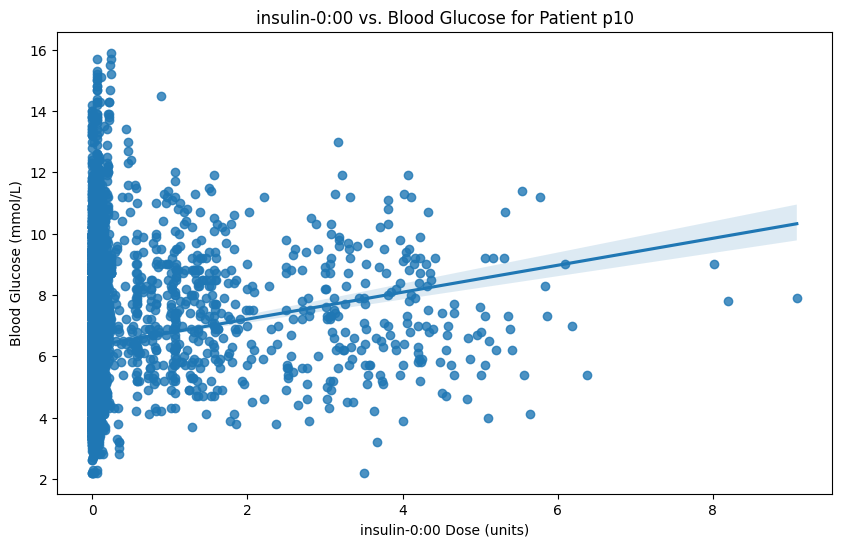

In [99]:
# Calculate correlation of each insulin column with 'bg+1:00'
correlation = p10[insulin_columns].corrwith(p10['bg+1:00'])

# Sort by absolute correlation to find the most relevant time lags
correlation_sorted = correlation.abs().sort_values(ascending=False)
print(correlation_sorted.head(10))  # Display the top 10 most correlated columns

# Plot the most correlated insulin column
most_correlated_column = correlation_sorted.index[0]
plt.figure(figsize=(10, 6))
sns.regplot(x=p10[most_correlated_column], y=p10['bg+1:00'])
plt.xlabel(f'{most_correlated_column} Dose (units)')
plt.ylabel('Blood Glucose (mmol/L)')
plt.title(f'{most_correlated_column} vs. Blood Glucose for Patient p10')
plt.show()


#### Analysis / observations ???

## 4. Steps and calories burned vs. blood glucose (Heatmap)
- <b>Purpose:</b> analyze how different levels of physical activity like walking affect blood glucose levels. This visualization will help identify patterns between activity levels (steps or calories burned) and changes in glucose.


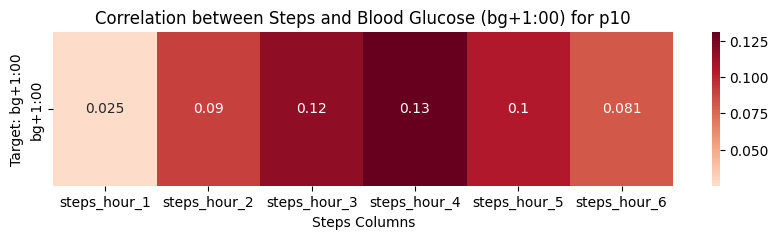

In [112]:
# Select the steps-* columns and the target variable
steps_columns = [col for col in patients.columns if col.startswith('steps-')]
target_column = 'bg+1:00'

# Sum steps in 6 distinct hours
# Each hour has 12 columns (since each column represents 5 minutes)
hourly_steps = {
    'steps_hour_1': p10[steps_columns[0:12]].sum(axis=1),  
    'steps_hour_2': p10[steps_columns[12:24]].sum(axis=1),  
    'steps_hour_3': p10[steps_columns[24:36]].sum(axis=1),  
    'steps_hour_4': p10[steps_columns[36:48]].sum(axis=1),  
    'steps_hour_5': p10[steps_columns[48:60]].sum(axis=1),  
    'steps_hour_6': p10[steps_columns[60:72]].sum(axis=1),  
}

# Create a DataFrame from the summed steps
hourly_steps_df = pd.DataFrame(hourly_steps)

# Add the target variable to the DataFrame
hourly_steps_df['bg+1:00'] = p10['bg+1:00']

# Calculate the correlation between the summed steps columns and the target variable
correlation_values = hourly_steps_df.corr()['bg+1:00'].drop('bg+1:00')

# Reshape the correlation values for the heatmap (1 row)
correlation_matrix = pd.DataFrame(correlation_values).T

# Create the heatmap
plt.figure(figsize=(10, 2))  # Adjust figure size to keep it horizontal (1 row)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', cbar=True, center=0)

# Add titles and labels
plt.title('Correlation between Steps and Blood Glucose (bg+1:00) for p10')
plt.xlabel('Steps Columns')
plt.ylabel('Target: bg+1:00')

# Show the heatmap
plt.show()


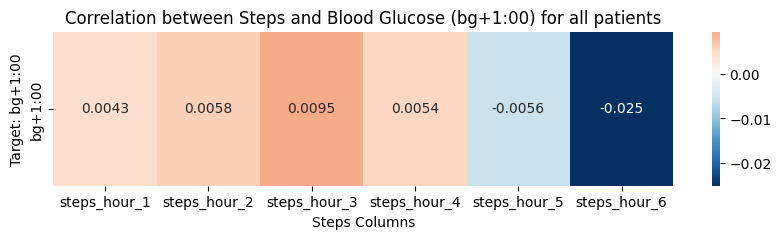

In [114]:
target_column = 'bg+1:00'

# Sum steps in 6 distinct hourly bins (non-overlapping)
# Each hour has 12 columns (since each column represents 5 minutes)
hourly_steps = {
    'steps_hour_1': patients[steps_columns[0:12]].sum(axis=1),    
    'steps_hour_2': patients[steps_columns[12:24]].sum(axis=1), 
    'steps_hour_3': patients[steps_columns[24:36]].sum(axis=1),  
    'steps_hour_4': patients[steps_columns[36:48]].sum(axis=1),  
    'steps_hour_5': patients[steps_columns[48:60]].sum(axis=1),  
    'steps_hour_6': patients[steps_columns[60:72]].sum(axis=1),  
}

# Create a DataFrame from the summed steps
hourly_steps_df = pd.DataFrame(hourly_steps)

# Add the target variable to the DataFrame
hourly_steps_df['bg+1:00'] = patients['bg+1:00']

# Calculate the correlation between the summed steps columns and the target variable
correlation_values = hourly_steps_df.corr()['bg+1:00'].drop('bg+1:00')

# Reshape the correlation values for the heatmap (1 row)
correlation_matrix = pd.DataFrame(correlation_values).T

# Create the heatmap
plt.figure(figsize=(10, 2))  # Adjust figure size to keep it horizontal (1 row)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', cbar=True, center=0)

# Add titles and labels
plt.title('Correlation between Steps and Blood Glucose (bg+1:00) for all patients')
plt.xlabel('Steps Columns')
plt.ylabel('Target: bg+1:00')

# Show the heatmap
plt.show()

### 5. Heart rate and glucose relationship 
- <b>Purpose:</b> explore how heart rate relates to blood glucose levels. It's relevant because an elevated heart rate might be correlated with glucose fluctuations, especially during physical activity or stress.
